## Project 🚧

The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand **what makes people interested into each other**. 

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.



In [2]:
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955","#d11544"]
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from plotly import graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns



PART 1. ANALYZE THE DATASET

At the beginning, I chose to display all the columns of the dataset to ensure that I pay attention to the entire data that makes it up and to understand better them : that's why I use the set_option ('display_max_rows')

In [3]:
#I choose to display the whole columns to be sure I can see all the elements of the dataset

pd.set_option('display.max_columns', 200) 

df=pd.read_csv(r"C:\Users\Utilisateur\Documents\SEVERINE\FORMATION\JEDHA\FULLSTAC\PROJET\1.TINDER\Speed_Dating_Data.csv",encoding="latin_1")# UFT8 unrecognized

df.head(20)



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

PART 2: STATICS OF THE DATASET : there are 8378 rows and 195 columns

In [4]:
print(df.shape)

print("Number of duplicate rows: ",df.duplicated().sum())

(8378, 195)
Number of duplicate rows:  0


In [5]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#I reset the option to limit ressources : now I neednt to show all of them together
pd.reset_option('display.max_columns') 

PART 3 : ANALYSIS OF THE MISSING VALUES

In [7]:
# Calculer le pourcentage de valeurs manquantes
MissingValue = df.isna().mean() * 100  
MissingValue_df = MissingValue.to_frame(name='Pourcentage_Missing')
MissingValue_df=MissingValue_df.sort_values(by='Pourcentage_Missing', ascending=False)

fig = px.histogram(MissingValue_df,'Pourcentage_Missing')
fig.show()



In [8]:
#list og the concerned columns to evaluate the interest to drop them
nb= MissingValue[MissingValue==0].count()

complete_colonnes = MissingValue[MissingValue==0].index  # Extraire les noms des colonnes avec aucune de valeurs manquantes
print(f"Il y a {len(complete_colonnes)} colonnes sans valeur manquante: {complete_colonnes}",)

missing_colonnes0_5 = MissingValue[(MissingValue >= 0) & (MissingValue < 5)].index 
print(f"Il y a {len(missing_colonnes0_5)} colonnes globalement remplies: {missing_colonnes0_5}",)

missing_colonnes60_75 = MissingValue[(MissingValue >= 60) & (MissingValue < 75)].index 
print(f"Il y a {len(missing_colonnes60_75)} colonnes peu remplies: {missing_colonnes60_75}",)

missing_colonnes = MissingValue[MissingValue>=75].index  
print(f"Il y a {len(missing_colonnes)} colonnes vides à plus de 75%: {missing_colonnes}",)

Il y a 13 colonnes sans valeur manquante: Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
       'partner', 'match', 'samerace', 'dec_o', 'dec'],
      dtype='object')
Il y a 85 colonnes globalement remplies: Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'race', 'imprace',
       'imprelig', 'from', 'goal', 'date', 'go_out', 'career', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1',
     

All the columns of the attributes X7_3 and X5_3 are fast empty ,and also, thge columns  X2_3 and X4_3 <br>
Moreover they deal with points of view of the other : for my analysis I prefer to give more importance directly to the feelings of the participants: that's why i will keep only with the colonne X1_n and X3_n (attr1-1, attr1_2 or shar3_1, shar3_2 for example) <br>
--> all the other columns of attributes can be excluded of my next analysises
 

PART 3 : FOCUS ON THE DATA TYPES

In [9]:
df.dtypes.value_counts()

float64    174
int64       13
object       8
Name: count, dtype: int64

In [10]:
colonnes_strings = df.select_dtypes(include='object').columns
print(f"The 8 string columns are : ", colonnes_strings)

The 8 string columns are :  Index(['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income',
       'career'],
      dtype='object')


We will prefer codes over manually written values (strings): CAREER + FIELD due to different forms of writing or spelling/typing errors(see below).<br>
--> THEREFORE, we can exclude these columns.

In [11]:
print(df['field'].unique())
df_Lawfiltered = df[df['field'].isin(['law', 'Law','LAW'])] #different forms for the field : law

['Law' 'law' 'Economics' 'Masters in Public Administration'
 'Masters of Social Work&Education' 'Finance' 'Business'
 'political science' 'money' 'Operations Research' 'TC (Health Ed)'
 'Psychology' 'social work' 'Social Work' 'Speech Language Pathology'
 'Speech Languahe Pathology' 'Educational Psychology'
 'Applied Maths/Econs' 'Mathematics' 'Statistics'
 'Organizational Psychology' 'Mechanical Engineering' 'Finanace'
 'Finance&Economics' 'Undergrad - GS' 'Mathematical Finance' 'Medicine'
 'MBA' 'LAW' nan 'psychology' 'German Literature'
 'Business & International Affairs' 'MFA Creative Writing' 'Engineering'
 'Electrical Engineering' 'Classics' 'Operations Research (SEAS)'
 'chemistry' 'Journalism' 'Elementary/Childhood Education (MA)'
 'microbiology' 'Masters of Social Work' 'Communications' 'Marketing'
 'Chemistry' 'International Educational Development'
 'Education Administration' 'Business (MBA)' 'Computer Science'
 'Climate-Earth and Environ. Science' 'financial math' 'Business

"Moreover, many columns return codes that are not very meaningful, such as GENDER, RACE, RACE_O, SAMERACE: replacing these values with more meaningful terms is necessary.

In [12]:
#Gender: Female=0 - Male=1 + aucune valeur manquante

df["gender"] = df["gender"].replace({1 : "Male", 0 : "Female"})

# race - Black/African American=1 - European/Caucasian-American=2 	Latino/Hispanic American=3 	Asian/Pacific Islander/Asian-American=4
	#Native American=5 	Other=6
cols = ["race", "race_o"]
df[cols] = df[cols].replace({1 : "Black/African American",
                            2 : "European/Caucasian-American",
                            3 : "Latino/Hispanic American",
                            4 : "Asian/Pacific Islander/Asian-American",
                            5 : "Native American",
                            6 : "Other"})

df["samerace"] = df["samerace"].replace ({1 : 'Yes', 0 : 'No'})

# 2 created columns created not to mess the matrix correlation
df["decStr"] = df["dec"].replace ({1 : 'Yes', 0 : 'No'})
df["dec_oStr"] = df["dec_o"].replace ({1 : 'Yes', 0 : 'No'})


PART 4:  FOCUS ON THE PEOPLE

In [13]:
#Consideration of personal data only, without any link to speed dating.
dfPeople=df[['iid','gender','age','race','imprelig','imprace','goal','field_cd','career_c',
             'condtn','undergra','mn_sat','tuition','go_out','date','from','zipcode','income']]

print("Number of duplicated columns: ", dfPeople.duplicated().sum())
dfPeople = dfPeople.drop_duplicates()

# Number of distinct values in the columns'idd' --> allow to know the number of partcipants
nombre_distincts_idd= dfPeople['iid'].nunique()
print(f"{nombre_distincts_idd} people participated on the speed dating")

Number of duplicated columns:  7827
551 people participated on the speed dating


There are as many women as men : we can easily compare the behaviour of each gender in the following analysis

In [14]:
DfGenre = dfPeople['gender'].value_counts().reset_index()
color_map = {'Male': "#4B9AC7", 'Female': '#d11544'}

fig = px.pie(DfGenre, names='gender', values='count',color='gender',
             color_discrete_map=color_map)

fig.update_layout(
    title="Distribution of participants by gender",
    width=500, 
    height=400)
fig.show()



In [ ]:

dfPeople['age_group'] = dfPeople['age'].fillna('Unknown')  # Replace NaN in 'age' with 'Unknown'

#  Create 'age_group' for ages, ensuring 'Unknown' stays as a string and numbers remain integers
dfPeople['age_group'] = dfPeople['age_group'].apply(    lambda x: (int(x) // 10) * 10 if isinstance(x, (int, float)) else x
)

#  Create a string format for age groups (e.g., "20-29")
dfPeople['age_group_str'] = dfPeople['age_group'].apply(
    lambda x: f'{int(x)}-{int(x)+9}' if isinstance(x, (int, float)) else 'Unknown'
)

#  Count the number of people per decade and gender
age_group_counts = dfPeople.groupby(['age_group_str', 'gender']).size().reset_index(name='count')
pivot_table = age_group_counts.pivot_table(values='count', index='age_group_str', columns='gender', aggfunc='sum', fill_value=0)

# add a colums "gender" based on the index at first
pivot_table['Gender'] = pivot_table.index

columns_order = ['Gender'] + [col for col in pivot_table.columns if col != 'Gender']
pivot_table = pivot_table[columns_order]

# Create a Pivot Table 
fig = go.Figure(data=[go.Table(
    header=dict(values=['Gender'] + list(pivot_table.columns[1:])), 
    cells=dict(
        values=[pivot_table['Gender']] + [pivot_table[col] for col in pivot_table.columns[1:]])
)])

fig.update_layout(
    title='Distribution of people by decade',
    autosize=True,
    width=600, 
    height=330
)

fig.show()


--> AGES : most people are between 20 and 29 years old in equal proportions. In the thirties, men are younger, but this balances out overall.<br>

x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---

--> GOALS : almost half people are looking fo having fun; far less to have a serious relationship... It already gives us some indications for the next steps.

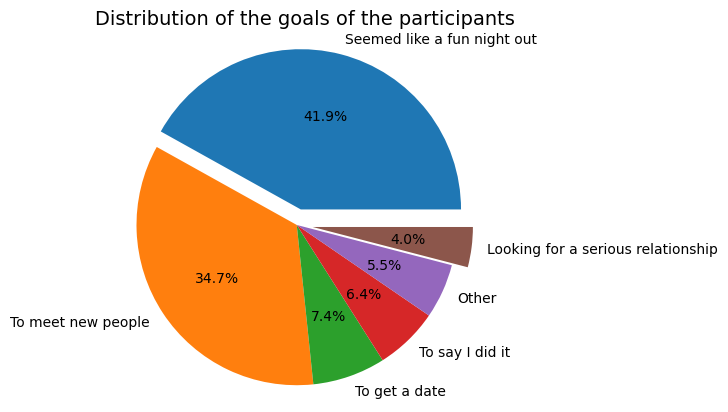

In [ ]:

DfGoal = dfPeople[['iid', 'gender', 'age', 'race', 'imprelig', 'imprace', 'goal']]

# Count the occurrences of each value in the 'goal' column
goal_counts = DfGoal['goal'].value_counts().reset_index()

# Rename the columns for clarity
goal_counts.columns = ['goal', 'count']

goal_labels = {
    1: "Seemed like a fun night out",
    2: "To meet new people",
    3: "To get a date",
    4: "Looking for a serious relationship",
    5: "To say I did it",
    6: "Other"
}

# Use the goal column as labels and count as values
labels = goal_counts['goal'].map(goal_labels)
values = goal_counts['count']

# Explode if necessary (optional, for emphasis on a slice)
explode = (0.1, 0, 0, 0, 0,0.1)  # Only "explode" the specifics slides to notice

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', shadow=False)
ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title('Distribution of the goals of the participants', fontsize=14)

# Show the plot
plt.show()



x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---x--x---x---

--> RACES : <br>More than half of the participants are Caucasian, followed by those of Asian descent, then Hispanic and african ones.<br> The distribution is generally balanced between men and women.

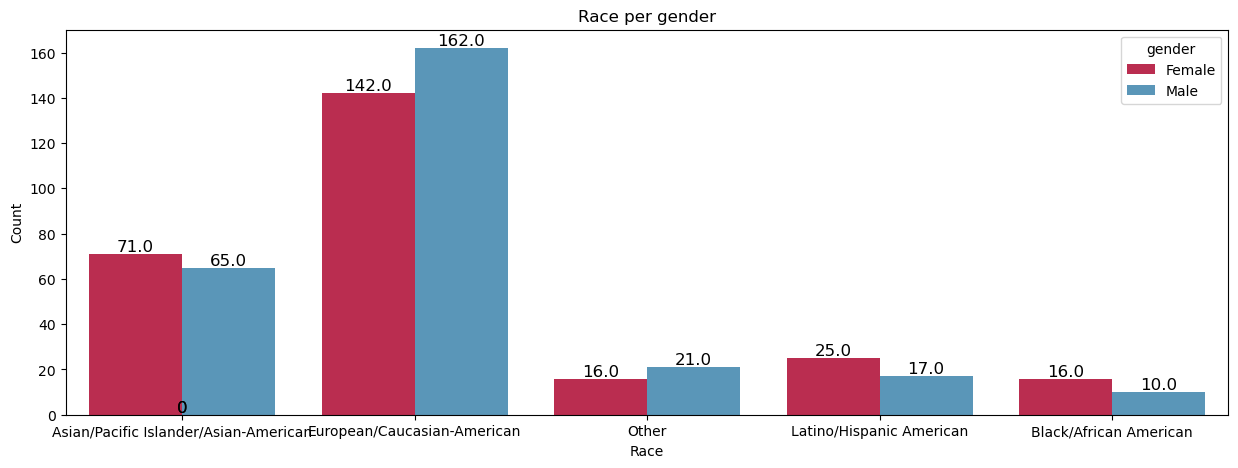

In [ ]:
# Create a countplot RACE
plt.figure(figsize=(15,5))

ax2 = sns.countplot(x='race', data=dfPeople, hue='gender', palette=palette)
ax2.set(title = 'Race per gender' , xlabel='Race', ylabel='Count')


for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Afficher les graphiques
plt.show()

IMPACT OF A PERSON'S RACE ON THEIR DECISIONS :<br>
     - Race holds an medium importance for people: those who consider it the most are African and Caucasian women.<br>
     - Religion holds an low importance for people: those who consider it the most are African and Caucasian women. 

In [ ]:
color_map = {'Female': "#4B9AC7", 'Male': "#d11544"}

fig = px.box(dfPeople, x='imprace', y='race', color='gender',
             color_discrete_map=color_map)

# Afficher le graphique

fig.update_layout(title="Importance de la race en fonction des races")

In [ ]:

color_map = {'Female': "#4B9AC7", 'Male': "#d11544"}

fig = px.box(dfPeople, x='imprelig', y='race', color='gender',
             color_discrete_map=color_map)
fig.update_layout(title="Importance of the religion depending on theraces")

FINAL DECISIONS:<br>
There is slightly more interaction with people of a different race (60%).<br>
The heatmap shows identical decision combinations depending on whether the partners are of the same race or not (with some variation in the ratio).. <br>                     ---> Despite the slight interest observed in the previous graphs, we can conclude that a person's race does not matter in their decisions thanks to the heat map

In [ ]:
DfSRace = df['samerace'].value_counts().reset_index()
DfSRace

,samerace,count
0,No,5062
1,Yes,3316


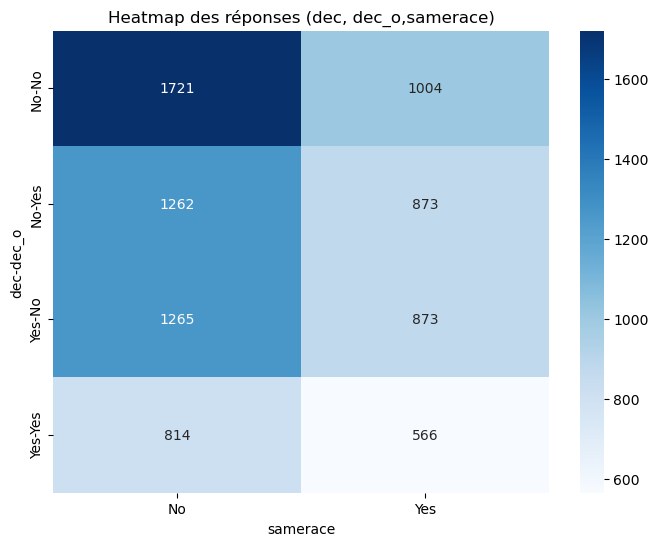

In [ ]:
df_pivot = pd.DataFrame({
    'dec': df['decStr'],
    'dec_o': df['dec_oStr'],
    'samerace': df['samerace']
}) 
# Créer une matrice de comptage pour les combinaisons de réponses
heatmap_data = df_pivot.groupby([ 'dec', 'dec_o','samerace']).size().unstack(fill_value=0)


# Afficher le heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.title("Heatmap des réponses (dec, dec_o,samerace)")
plt.show()

PART 5: RELATION BETWEEN THE DECISIONS AND THE INTEREST OF THE PARTICIPANTS  :<br>

In [ ]:

palette = {'Male': "#4B9AC7", 'Female': "#d11544"}
# Calculate the counts of the 'dec' column


# Create a subplot with two bar charts (one vertical and one horizontal)
fig = make_subplots(
    rows=1, cols=1, 
    subplot_titles=( "Decision of the partners"),
    specs=[[{'type': 'bar'}]]  # Specify bar chart type for both subplots
)



deco_counts = df.groupby(['dec_oStr', 'gender']).size().unstack(fill_value=0)
# Horizontal bar chart (second subplot)
fig.add_trace(
    go.Bar(
        x=deco_counts.index, 
        y=deco_counts['Male'],  # Male counts
        name="Male", 
        marker_color="#4B9AC7",
        text=deco_counts['Male'],  # Ajouter les valeurs au sommet des barres
        textposition='outside',  # Positionner les valeurs en dehors des barres
    ),
    row=1, col=1  # Add this trace to the first subplot
)

fig.add_trace(
    go.Bar(
        x=deco_counts.index, 
        y=deco_counts['Female'],  # Female counts
        name="Female", 
        marker_color="#d11544",
        text=deco_counts['Female'],  # Ajouter les valeurs au sommet des barres
        textposition='outside',  # Positionner les valeurs en dehors des barres
    ),
    row=1, col=1  # Add this trace to the first subplot
)

# Update layout and add titles
fig.update_layout(
    title_text="Distribution of 'decision' (Yes vs No)",
    showlegend=True,  # Hide the legend as it's not necessary here
    height=600,  # Set a fixed height for the figure
    width=1200,  # Set a fixed width for the figure
)

# Show the plot
fig.show()


We can notice that women accept more dates than the men <br>
What  about each individual's interests in choosing a partner?


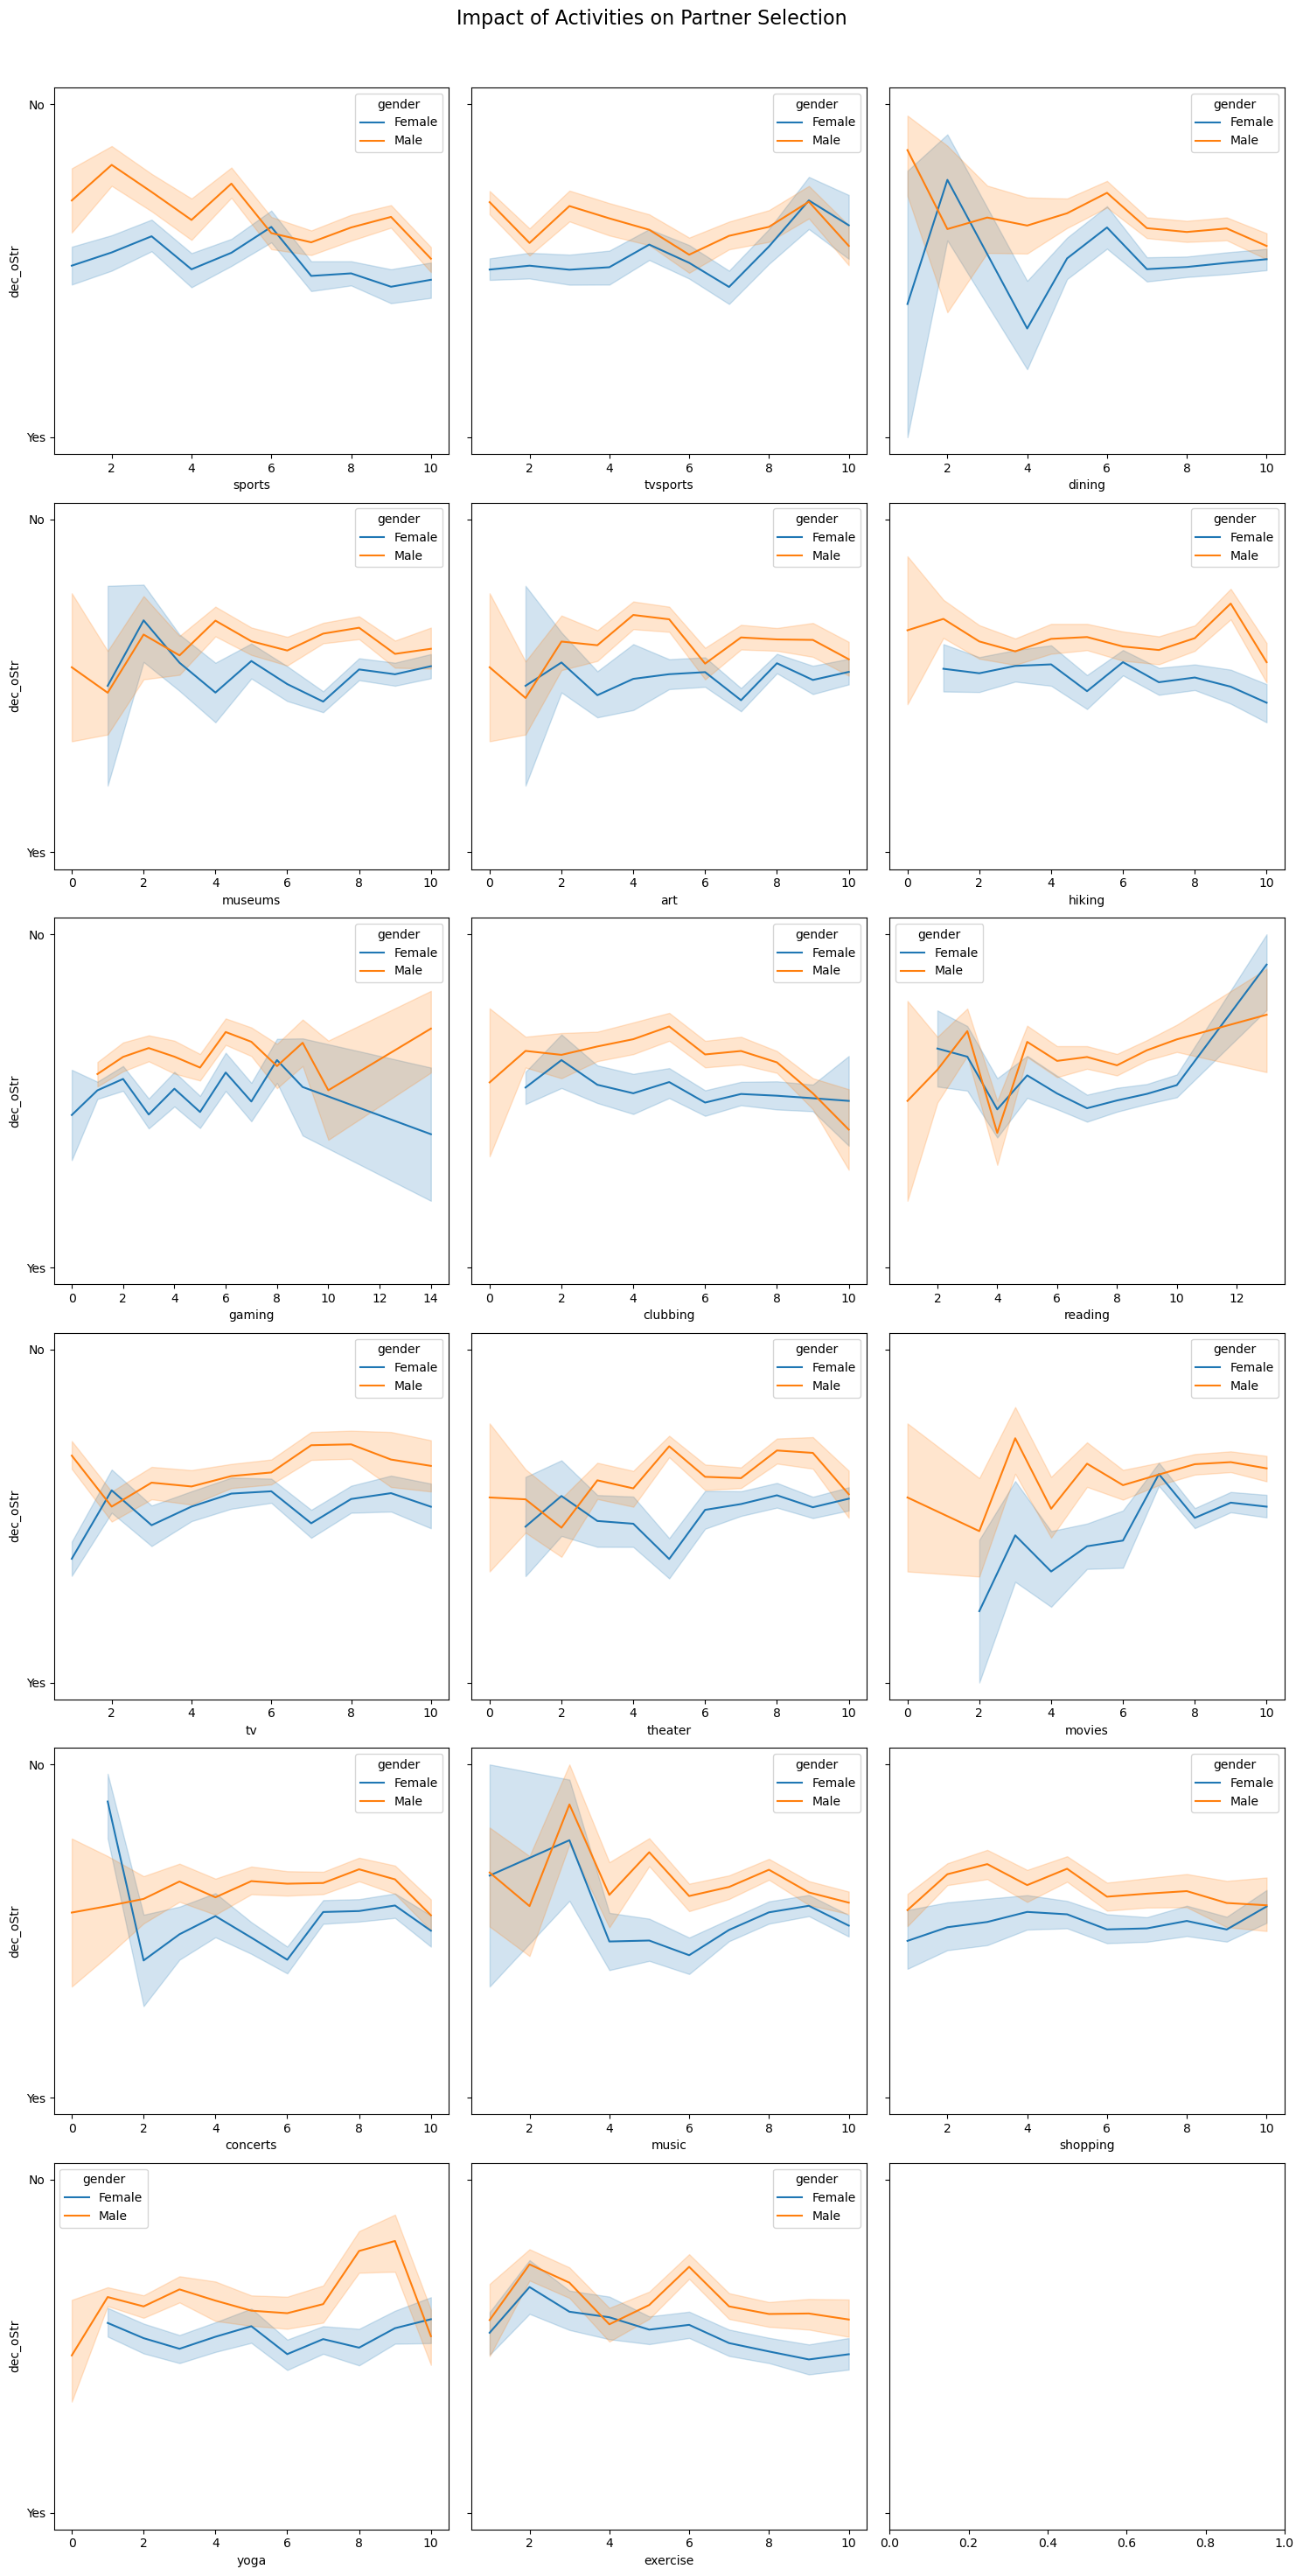

In [ ]:
#dec_o : decision of the partner the night of the event

# Créez un subplot with 6 rows (for each activity) and 3 columns to compare the impact of activities on the decision
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15,30),sharey=True)

sns.lineplot(x = 'sports' , y = 'dec_oStr' , data = df, hue = 'gender',ax=axs[0,0])
sns.lineplot(x="tvsports", y="dec_oStr", hue="gender", data=df,ax=axs[0,1])
sns.lineplot(x = 'dining' , y = 'dec_oStr' , data = df, hue = 'gender',ax=axs[0,2])
sns.lineplot(x="museums", y="dec_oStr", hue="gender", data=df,ax=axs[1,0])
sns.lineplot(x="art", y="dec_oStr", hue="gender", data=df,ax=axs[1,1])
sns.lineplot(x = 'hiking' , y = 'dec_oStr' , data = df, hue = 'gender',ax=axs[1,2])
sns.lineplot(x="gaming", y="dec_oStr", hue="gender", data=df,ax=axs[2,0])
sns.lineplot(x="clubbing", y="dec_oStr", hue="gender", data=df,ax=axs[2,1])
sns.lineplot(x = 'reading' , y = 'dec_oStr' , data = df, hue = 'gender',ax=axs[2,2])
sns.lineplot(x="tv", y="dec_oStr", hue="gender", data=df,ax=axs[3,0])
sns.lineplot(x="theater", y="dec_oStr", hue="gender", data=df,ax=axs[3,1])
sns.lineplot(x="movies", y="dec_oStr", hue="gender", data=df,ax=axs[3,2])
sns.lineplot(x = 'concerts' , y = 'dec_oStr' , data = df, hue = 'gender',ax=axs[4,0])
sns.lineplot(x="music", y="dec_oStr", hue="gender", data=df,ax=axs[4,1])
sns.lineplot(x="shopping", y="dec_oStr", hue="gender", data=df,ax=axs[4,2])
sns.lineplot(x = 'yoga' , y = 'dec_oStr' , data = df, hue = 'gender',ax=axs[5,0])
sns.lineplot(x = 'exercise' , y = 'dec_oStr' , data = df, hue = 'gender',ax=axs[5,1])

plt.tight_layout()  # This will adjust subplots to prevent overlap
fig.suptitle("Impact of Activities on Partner Selection", fontsize=16)
fig.subplots_adjust(top=0.95)  # Adjust top space for the suptitle
plt.show()



-> We can observe that the activity profile of participants has no particular impact on partner selection <br> ... Let's focus more on the impressions and responses after the dates.

PART6 : EVOLUTION OF THE FEELLINGS

As already explained in part 2, we will focus on the attributes X1_n and X3_n, where: <br>
- 'n' refers to a stage in this speed dating study (1: the day of the date - 2: the day after - 3: 3-4 weeks after the date)
- X1 refers to the attributes of what you want to know about the opposite sex (ATTRactive, SINCere, INTelligent, FUN, AMBitious, SHARed interests/hobbies)"
- X3 refers on the niviel you think you measure up

Even though the feedback 3-4 weeks after the event is only completed at 52.56%, it makes sense that the feedback after such a delay can only be lower, and this aspect can be taken into account in our analysis, above all we will refer to the mean.

In [ ]:
dfJourJ = df.groupby("gender")[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean().reset_index()
data = pd.DataFrame(dfJourJ)
df_meltedJ = data.melt(id_vars=['gender'], 
                    value_vars=['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'],
                    var_name='attribute', value_name='value')


dfLendemain=df.groupby("gender")[['attr1_2', 'sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2']].mean().reset_index()
data = pd.DataFrame(dfLendemain)
df_meltedL = data.melt(id_vars=['gender'], 
                    value_vars=['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2'],
                    var_name='attribute', value_name='value')


df3_4S=df.groupby("gender")[['attr1_3', 'sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3']].mean().reset_index() 
data = pd.DataFrame(df3_4S)
df_melted3_4S = data.melt(id_vars=['gender'], 
                    value_vars=['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3'],
                    var_name='attribute', value_name='value')


In [ ]:
palette = {'Male': "#4B9AC7", 'Female': "#d11544"}


# convert into pivot table
pivot_table1 = df_meltedJ.pivot_table(index='attribute', columns='gender', values='value').round(2)
pivot_table2 = df_meltedL.pivot_table(index='attribute', columns='gender', values='value').round(2)
pivot_table3 = df_melted3_4S.pivot_table(index='attribute', columns='gender', values='value').round(2)


fig1 = make_subplots(
    rows=1, cols=3, 
    subplot_titles=("day-D", "day after", "3-4 weeks after"),
    specs=[[{'type': 'table'}, {'type': 'table'}, {'type': 'table'}]])  # first row : Pivot Tables
           
fig1.add_trace(
    go.Table(
        header=dict(values=["Attribute", "Female", "Male"]),
        cells=dict(values=[pivot_table1.index, pivot_table1['Female'], pivot_table1['Male']])
    ),
    row=1, col=1  # Premier subplot (ligne 1, colonne 1)
)
fig1.add_trace(
    go.Table(
        header=dict(values=["Attribute", "Female", "Male"]),
        cells=dict(values=[pivot_table2.index, pivot_table2['Female'], pivot_table2['Male']])
    ),
    row=1, col=2  
)
fig1.add_trace(
    go.Table(
        header=dict(values=["Attribute", "Female", "Male"]),
        cells=dict(values=[pivot_table3.index, pivot_table3['Female'], pivot_table3['Male']])
    ),
    row=1, col=3  
)

fig1.update_layout(
    title_text="Comparison of expectations regarding the opposite sex",
    height=350,
    width=1200)
fig1.show()

fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=("day-D", "day after", "3-4 weeks after"),
    specs=[[{'type': 'bar'}, {'type': 'bar'}, {'type': 'bar'}]]  
)



for gender in df_meltedJ['gender'].unique():
    df_gender = df_meltedJ[df_meltedJ['gender'] == gender]
    fig.add_trace(
        go.Bar(
            x=df_gender['attribute'], 
            y=df_gender['value'],
            name=gender, 
            marker=dict(color=palette[gender])
        ),
        row=1, col=1
    )


# Tracé pour le deuxième sous-graphique (1,2)
for gender in df_meltedL['gender'].unique():
    df_gender = df_meltedL[df_meltedL['gender'] == gender]
    fig.add_trace(
        go.Bar(
            x=df_gender['attribute'], 
            y=df_gender['value'],
            name=gender, 
            marker=dict(color=palette[gender])
        ),
        row=1, col=2
    ) 

# Tracé pour le troisième sous-graphique (1,3)
for gender in df_melted3_4S['gender'].unique():
    df_gender = df_melted3_4S[df_melted3_4S['gender'] == gender]
    fig.add_trace(
        go.Bar(
            x=df_gender['attribute'], 
            y=df_gender['value'],
            name=gender, 
            marker=dict(color=palette[gender])
        ),
        row=1, col=3
    )



fig.update_layout(
    barmode='group',  # Les barres seront côte à côte
    yaxis=dict(range=[0, 40]),  # Range of each plot 
    yaxis2=dict(range=[0, 40]),  # have to be the same
    yaxis3=dict(range=[0, 40]),  # to compare better
  
)


fig.show()



In [ ]:

dfJourJ = df.groupby("gender")[['attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].mean().reset_index()

dfLendemain=df.groupby("gender")[['attr3_2', 'sinc3_2','intel3_2','fun3_2','amb3_2']].mean().reset_index()

df3_4S=df.groupby("gender")[['attr3_3', 'sinc3_3','intel3_3','fun3_3','amb3_3']].mean().reset_index()

data = pd.DataFrame(dfJourJ)
df_meltedJ = data.melt(id_vars=['gender'], 
                    value_vars=['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'],
                    var_name='attribute', value_name='value')

data = pd.DataFrame(dfLendemain)
df_meltedL = data.melt(id_vars=['gender'], 
                    value_vars=['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2'],
                    var_name='attribute', value_name='value')

data = pd.DataFrame(df3_4S)
df_melted3_4S = data.melt(id_vars=['gender'], 
                    value_vars=['attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3'],
                    var_name='attribute', value_name='value')


pivot_table1 = df_meltedJ.pivot_table(index='attribute', columns='gender', values='value').round(2)
pivot_table2 = df_meltedL.pivot_table(index='attribute', columns='gender', values='value').round(2)
pivot_table3 = df_melted3_4S.pivot_table(index='attribute', columns='gender', values='value').round(2)


fig1 = make_subplots(
    rows=1, cols=3, 
    subplot_titles=("day-D", "day after", "3-4 weeks after"),
    specs=[[{'type': 'table'}, {'type': 'table'}, {'type': 'table'}]])  # first row : Pivot Tables
           
fig1.add_trace(
    go.Table(
        header=dict(values=["Attribute", "Female", "Male"]),
        cells=dict(values=[pivot_table1.index, pivot_table1['Female'], pivot_table1['Male']])
    ),
    row=1, col=1  # Premier subplot (ligne 1, colonne 1)
)
fig1.add_trace(
    go.Table(
        header=dict(values=["Attribute", "Female", "Male"]),
        cells=dict(values=[pivot_table2.index, pivot_table2['Female'], pivot_table2['Male']])
    ),
    row=1, col=2  
)
fig1.add_trace(
    go.Table(
        header=dict(values=["Attribute", "Female", "Male"]),
        cells=dict(values=[pivot_table3.index, pivot_table3['Female'], pivot_table3['Male']])
    ),
    row=1, col=3  
)

fig1.update_layout(
     title_text="Evolution of one's opinion on their own qualities",
    height=350,
    width=1200)
fig1.show()


palette = {'Male':  "#4B9AC7", 'Female': "#d11544"}

fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=("day-D", "day after", "3-4 weeks after"),
    specs=[[{'type': 'bar'}, {'type': 'bar'}, {'type': 'bar'}]]  # Spécification du type de graphique pour chaque subplot
)
for gender in df_meltedJ['gender'].unique():
    df_gender = df_meltedJ[df_meltedJ['gender'] == gender]
    fig.add_trace(
        go.Bar(
            x=df_gender['attribute'], 
            y=df_gender['value'],
            name=gender, 
            marker=dict(color=palette[gender])
        ),
        row=1, col=1
    )


# Tracé pour le deuxième sous-graphique (1,2)
for gender in df_meltedL['gender'].unique():
    df_gender = df_meltedL[df_meltedL['gender'] == gender]
    fig.add_trace(
        go.Bar(
            x=df_gender['attribute'], 
            y=df_gender['value'],
            name=gender, 
            marker=dict(color=palette[gender])
        ),
        row=1, col=2
    ) 

# Tracé pour le troisième sous-graphique (1,3)
for gender in df_melted3_4S['gender'].unique():
    df_gender = df_melted3_4S[df_melted3_4S['gender'] == gender]
    fig.add_trace(
        go.Bar(
            x=df_gender['attribute'], 
            y=df_gender['value'],
            name=gender, 
            marker=dict(color=palette[gender])
        ),
        row=1, col=3
    )



fig.update_layout(
    barmode='group',  # Les bur carres seront côte à côte
    yaxis=dict(range=[0, 15]),  
    yaxis2=dict(range=[0, 15]),  
    yaxis3=dict(range=[0, 15]),  
)

# Afficher le graphique
fig.show()

**We can notice that people, as women and men, are more interesting by Attractive and Intelligent persons all along the process**.<br>
**Their opinion of themselves is not influenced as the meetings go on.**

PART 6 FEELINGS AFTER THE DATES <br> Now we will focus on the data related to the meetings and outcomes given.<br> 

We will only keep the following elements in the final part of our study : <br>
--> iid: unique subject number, group(wave id gender) /n <br>
--> id:  subject number within wave <br>
-->gender:	Female=0 	Male=1/n <br>
-->idg: subject number within gender, group(id gender)/n <br>
-->condtn: 	1=limited choice  --  	2=extensive choice/n <br>
--> wave: round:number of people that met in wave<br>
--> wave : pour savoir le nombre de tou fait par personnes<br>
-->round:		number of people that met in wave<br>
--> position:  	station number where met partner <br>
--> order: the number of date that night when met partner<br>
--> positin1:	station number where started <br>
--> int_corr:	correlation between participant’s and partner’s ratings of interests in
-->date_3:Have you been on a date with any of your matches? : 	Yes=1   No=2<br>
--> them_cal<br>
--> you_call<br>
--> dec : decision of participant the night of event<br>
--> dec_o : decision of partner the night of event <br>
--> prob : How probable do you think it is that this person will say 'yes' for you <br>
--> met : Have you met this person before? <br>
--> match		1=yes, 0=no <br>
--< match_es:How many matches do you estimate you will get (a match occurs when you and your partner both check “Yes” next to decision)?: <br>
--> satis_2: Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied) <br>
--> length :Four minutes is: Too little=1 	Too much=2 	Just Right=3 <br>
--> numdat_2: The number of Speed "Dates" you had was: 	Too few=1 	Too many=2 	Just right=3/n <br>



In [ ]:
dfFinal=df[['iid','id','idg','condtn','wave','round','order','position','positin1','match','int_corr','dec','dec_o','prob','met','match_es','satis_2','length','numdat_2','you_call','them_cal','date_3']]
dfFinal.head(3)


,iid,id,idg,condtn,wave,round,order,position,positin1,match,...,dec_o,prob,met,match_es,satis_2,length,numdat_2,you_call,them_cal,date_3
0,1,1.0,1,1,1,10,4,7,NaN,0,...,0,6.0,2.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0
1,1,1.0,1,1,1,10,3,7,NaN,0,...,0,5.0,1.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0
2,1,1.0,1,1,1,10,10,7,NaN,1,...,1,NaN,1.0,4.0,6.0,2.0,1.0,1.0,1.0,0.0


In [ ]:
#quick analysis of the dataset

#number of rows and columns
print(dfFinal.shape)

#duplicated rows
print("Nombre de lignes dupliquees: ",dfFinal.duplicated().sum())

#Missing values
MissingValue = dfFinal.isna().mean() * 100  # percentage
MissingValue_dfFinal = MissingValue.to_frame(name='Pourcentage_Missing')
MissingValue_dfFinal.sort_values(by='Pourcentage_Missing', ascending=False)

(8378, 22)
Nombre de lignes dupliquees:  0


,Pourcentage_Missing
date_3,52.566245
them_cal,52.566245
you_call,52.566245
positin1,22.033898
match_es,14.000955
numdat_2,11.279542
length,10.921461
satis_2,10.921461
met,4.476009
prob,3.688231


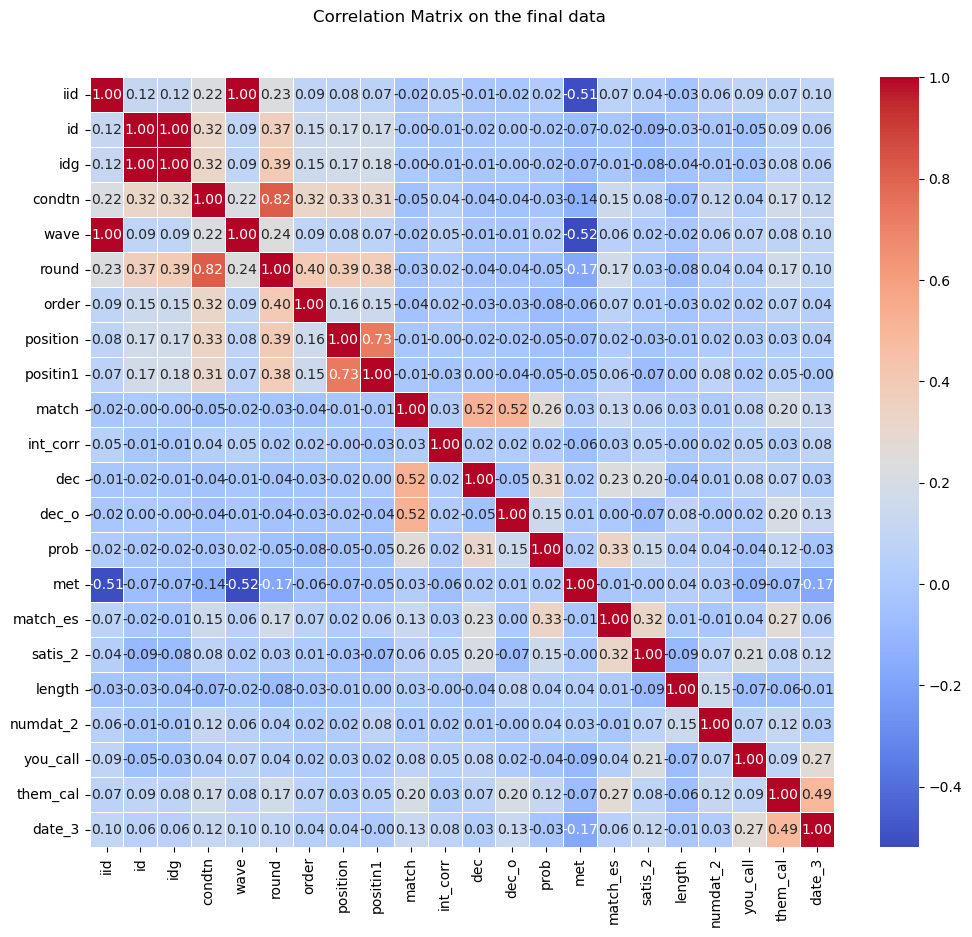

In [ ]:


# corrélation Matrix
cor = dfFinal.corr()


cor_rounded = cor.round(2)

# Agrandir l'affichage de la matrice de corrélation
plt.figure(figsize=(12, 10))  

# Afficher la matrice de corrélation 
sns.heatmap(cor_rounded, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.6)

# Ajouter un titre
plt.title("Correlation Matrix on the final data ", pad=40)

# Afficher la matrice de corrélation
plt.show()

--> This correlation matrix allows us to observe that there is no link regarding the position in the date sequence.<br>
However, we note a link between : <br>
    
      -   dec_o and prob 
      - match-es and satis2+ 
        - date 3, them call and you  call

In [ ]:
# Pourcentage de réussite : nombre de match par rapport au nombre de personne rencontrés# 

dfWaveCount = dfFinal.groupby('iid')['round'].count().reset_index()


dfWaveCount.rename(columns={'round': 'count_person'}, inplace=True)

# Calcul du pourcentage
dfWaveCount['pourcentage'] = (dfFinal['match'].groupby(df['iid']).first().values / dfWaveCount['count_person']) * 100
df_sorted = dfWaveCount.sort_values(by='pourcentage', ascending=True)




# Filtrer les données pour ne garder que celles dont les pourcentages sont > 5
df_filtered = df_sorted[df_sorted['pourcentage']>0]

# Créer un pie chart avec les données filtrées
fig_pie = px.pie(df_filtered, 
                 names='pourcentage',  # Utiliser 'pourcentage' pour les noms des sections
                 values='pourcentage',  # Utiliser 'pourcentage' pour les tailles des sections
                 title='Taux de réussite')
fig_pie.update_layout(
    width=800,  # Largeur du graphique
    height=800,  # Hauteur du graphique
)
# Afficher le pie chart
fig_pie.show()



we can notice that more than half the participant have finally a rate between  10 and 16.6%.<br>
What about the nivel of feelings of each on after the dates? <br>

     -A  entre dec_o et prob

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12700\3206037980.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




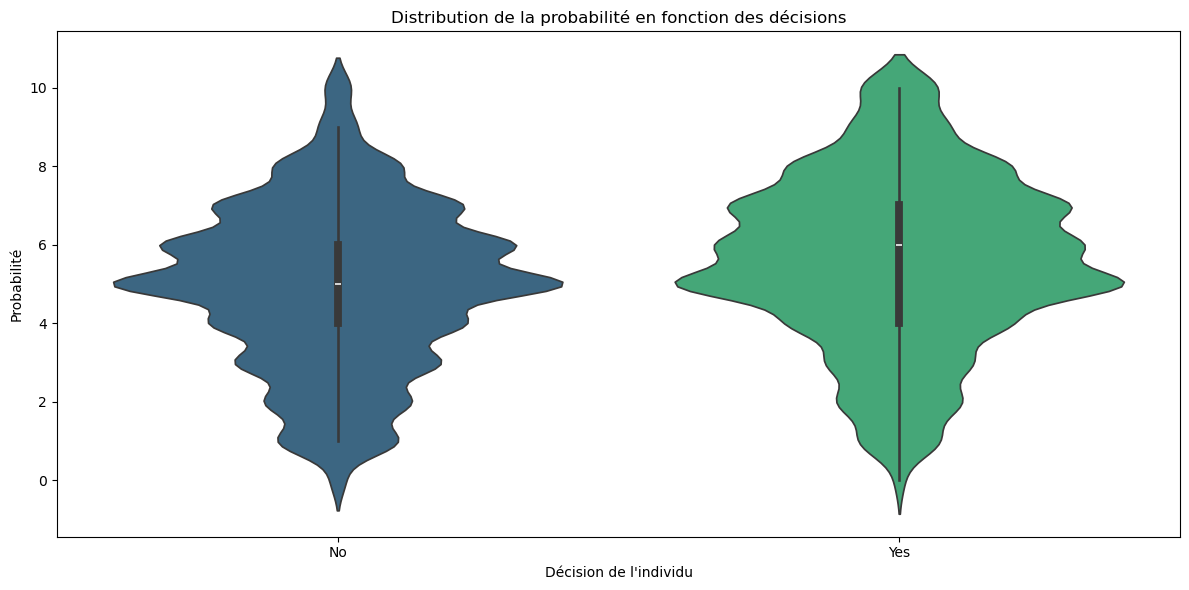

In [ ]:
#voir plutot le nombre de dec_O pour une réelle comparaison

# Violin plot pour 'prob' et 'dec_o' / 'dec'
plt.figure(figsize=(12, 6))
sns.violinplot(x='dec_o', y='prob', data=df, palette='viridis')

plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Distribution de la probabilité en fonction des décisions")
plt.xlabel("Décision de l'individu")
plt.ylabel("Probabilité")
fig.update_layout(
    xaxis=dict(
        tickvals=[0, 1],  # Les valeurs à remplacer
        ticktext=['No', 'Yes']  # Remplacement par Yes et No
    )
)

plt.tight_layout()

# Afficher le graphique
plt.show()

We can notice that the probability is higher on the 'yes' side, indicating a higher probability of success on that side.<br>
What about the satisfaction in relation to the discrepancy between expected and actual number of matches? <br>

     B-  entre match-es et satis2+ 

   iid  nbMatch   id  idg  condtn  wave  round  order  position  positin1  \
0    1        4  1.0    1       1     1     10      4         7       NaN   
1    1        4  1.0    1       1     1     10      3         7       NaN   
2    1        4  1.0    1       1     1     10     10         7       NaN   

   ...  prob  met  match_es  satis_2  length  numdat_2  you_call  them_cal  \
0  ...   6.0  2.0       4.0      6.0     2.0       1.0       1.0       1.0   
1  ...   5.0  1.0       4.0      6.0     2.0       1.0       1.0       1.0   
2  ...   NaN  1.0       4.0      6.0     2.0       1.0       1.0       1.0   

   date_3  erreur  
0     0.0     0.0  
1     0.0     0.0  
2     0.0     0.0  

[3 rows x 24 columns]


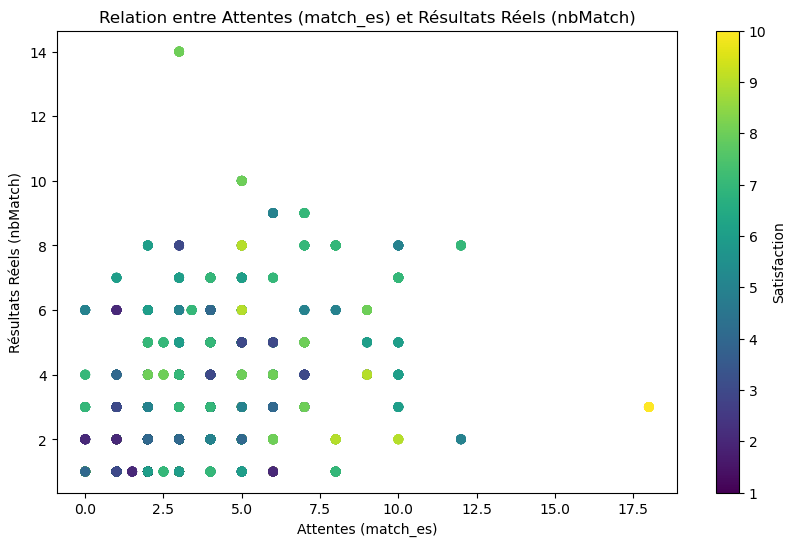

In [ ]:
#C #satis_2', 'match_es' et  l'écart entre les attentes et les résultats
#print (dfFinal[['iid','satis_2', 'match', 'match_es']])

nb_match_per_iid = dfFinal[dfFinal['match'] == 1].groupby('iid').size().reset_index(name='nbMatch')



nb_match_per_iid = nb_match_per_iid.merge(dfFinal, on='iid', how='left')


# Calcul de la colonne 'erreur' comme la différence entre match_es et nbMatch
nb_match_per_iid["erreur"] = nb_match_per_iid["match_es"] - nb_match_per_iid["nbMatch"]
print(nb_match_per_iid.head(3))

# Création du nuage de points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(nb_match_per_iid['match_es'], nb_match_per_iid['nbMatch'], c=nb_match_per_iid['satis_2'], cmap='viridis')

# Ajouter une barre de couleurs
plt.colorbar(scatter, label='Satisfaction')

# Ajouter des titres et labels
plt.title('Relation entre Attentes (match_es) et Résultats Réels (nbMatch)')
plt.xlabel('Attentes (match_es)')
plt.ylabel('Résultats Réels (nbMatch)')

# Afficher le graphique
plt.show()

 


we can confirm that the satisfaction has an impact :<br>
   -the more satisfied you are, the more match you hope <br>
   -the more satisfied you are, the more match you have <br>
Sometimes, a person may have a resilient and optimistic attitude, where hope is greater than reality (match_es > nbMatch), but satisfaction remains high because they have a positive outlook on the situation



     c-  entre date_3 et them_call+you_call
Now we can analyze whether people prefer to initiate the meetings themselves or wait to be called and realize that men are more likely to call than women to arrange dates.

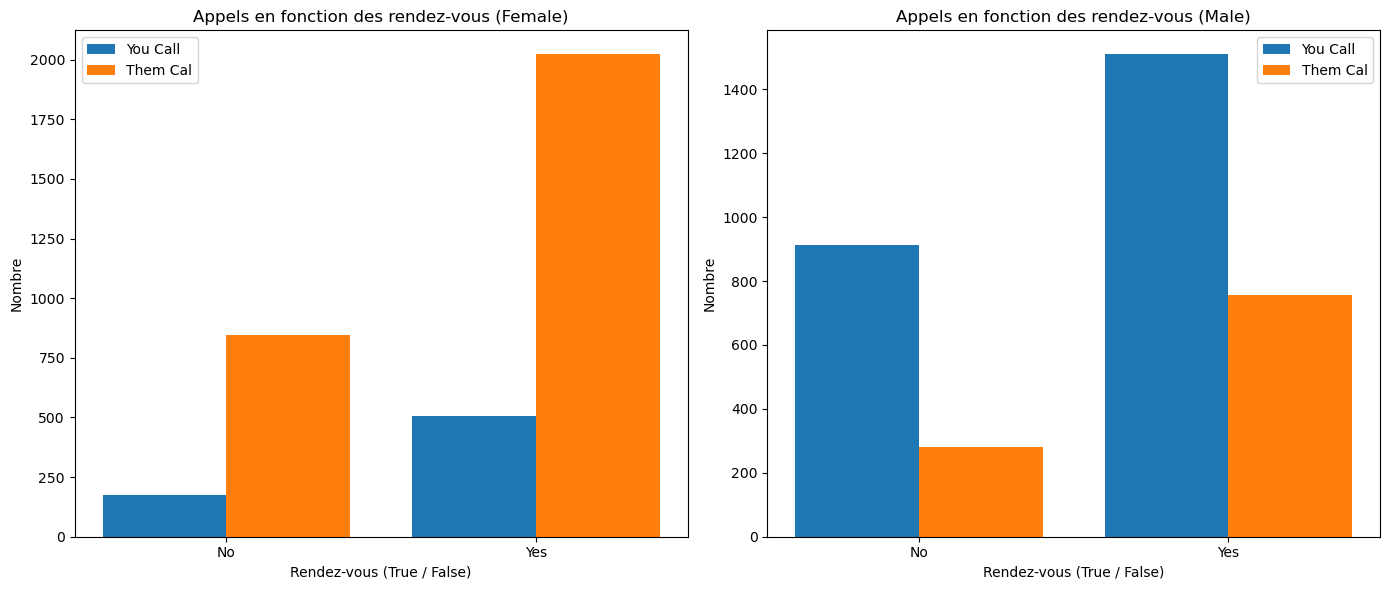

In [ ]:
 #date_3 et them_call+you_call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Filtrer et effectuer l'agrégation pour "Female"
grouped_female = df[df['gender'] == 'Female'].groupby('date_3').agg(
    total_you_call=('you_call', 'sum'),
    total_them_cal=('them_cal', 'sum')
).reset_index()

# Tracer le graphique pour les femmes (ax1)
ax1.bar(grouped_female.index - 0.2, grouped_female['total_you_call'], width=0.4, label='You Call', align='center')
ax1.bar(grouped_female.index + 0.2, grouped_female['total_them_cal'], width=0.4, label='Them Cal', align='center')
ax1.set_xlabel('Rendez-vous (True / False)')
ax1.set_ylabel('Nombre')
ax1.set_title('Appels en fonction des rendez-vous (Female)')
ax1.set_xticks(grouped_female.index)
ax1.set_xticklabels(grouped_female['date_3'].apply(lambda x: 'Yes' if x else 'No'))
ax1.legend()

# Filtrer et effectuer l'agrégation pour "Male"
grouped_male = df[df['gender'] == 'Male'].groupby('date_3').agg(
    total_you_call=('you_call', 'sum'),
    total_them_cal=('them_cal', 'sum')
).reset_index()

# Tracer le graphique pour les hommes (ax2)
ax2.bar(grouped_male.index - 0.2, grouped_male['total_you_call'], width=0.4, label='You Call', align='center')
ax2.bar(grouped_male.index + 0.2, grouped_male['total_them_cal'], width=0.4, label='Them Cal', align='center')
ax2.set_xlabel('Rendez-vous (True / False)')
ax2.set_ylabel('Nombre')
ax2.set_title('Appels en fonction des rendez-vous (Male)')
ax2.set_xticks(grouped_male.index)
ax2.set_xticklabels(grouped_male['date_3'].apply(lambda x: 'Yes' if x else 'No'))
ax2.legend()

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher le graphique
plt.show()





## CONCLUSION

Most participants are between 20 and 30 years old, with nearly half seeking fun rather than a serious relationship.<br>
The activity profile of participants does not have a significant impact on partner selection. **But people are more attracted to intelligent and attractive individuals, regardless of the stage in the process**.<br>
Race and religion have only a minor importance overall, and diversity is generally accepted.<br>

It can also be noted that the success of matches depends on the positioning of the participants :<br>
      --> the more confident people are in the likelihood of matching with several others, the more likely they are to have a positive outcome.<br> 
      --> satisfaction seems to impact match expectations: the more satisfied you are, the more matches you hope for.<br>

Sometimes, a person may remain optimistic, where hope exceeds reality (more matches expected than actually received), but satisfaction remains high due to a positive outlook.






